<a href="https://colab.research.google.com/github/tohnperfect/BSC_DPDM23/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
shopping_data = pd.read_csv('/content/drive/MyDrive/bsc_dpdm23_data/customer_shopping_data.csv')

In [5]:
shopping_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


# ข้อมูลบางส่วนมีค่าตัวแปรบางตัวที่ไม่ทราบค่า (Missing Data)

In [7]:
shopping_data.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [23]:
shopping_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


### เราจะลบ Price ของ records ที่เป็น Clothing, Cash, Metrocity ออก เพื่อจำลอง Missing Data

ตรวจสอบค่า ก่อน missing

In [11]:
shopping_data[(shopping_data['category']=='Clothing') &
              (shopping_data['payment_method']=='Cash') &
              (shopping_data['shopping_mall']=='Metrocity')].describe()

,age,quantity,price
count,2284.000000,2284.000000,2284.000000
mean,43.657618,2.982049,894.853275
std,14.974270,1.408979,422.806539
min,18.000000,1.000000,300.080000
25%,30.750000,2.000000,600.160000
50%,44.000000,3.000000,900.240000
75%,57.000000,4.000000,1200.320000
max,69.000000,5.000000,1500.400000


ทำให้ price missing

In [16]:
import numpy as np

In [12]:
willbemissing = shopping_data[(shopping_data['category']=='Clothing') &
              (shopping_data['payment_method']=='Cash') &
              (shopping_data['shopping_mall']=='Metrocity')]

In [17]:
willbemissing['price'] = np.nan

<ipython-input-17-cb08903f3628>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  willbemissing['price'] = np.nan


In [18]:
willbemissing

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,NaN,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,NaN,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,NaN,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,NaN,Cash,25/02/2023,Metrocity


แยก data ส่วนที่ไม่ missing ออกมา

In [19]:
nomissing=shopping_data[(shopping_data['category']!='Clothing') |
              (shopping_data['payment_method']!='Cash') |
              (shopping_data['shopping_mall']!='Metrocity')]

จับมันกลับมารวมกัน

In [20]:
new_shopping_data = pd.concat([willbemissing,nomissing])
new_shopping_data.shape

(99457, 10)

## Example

In [21]:
new_shopping_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [22]:
new_shopping_data.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price              True
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

## Fix

### 1. ignore (ลบออกไปเลย)

Quiz
- data หายไปกี่ %
- mean data รวมหลังจากแก้ missing เป็นเท่าไหร่

In [24]:
new_shopping_data_drop = new_shopping_data.dropna()

In [26]:
100*((len(new_shopping_data)-len(new_shopping_data_drop))/len(new_shopping_data))

2.2964698311833254

In [27]:
new_shopping_data_drop.describe()

,age,quantity,price
count,97173.000000,97173.000000,97173.000000
mean,43.421671,3.003931,684.423873
std,14.990459,1.413123,949.438067
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,40.660000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


### 2. เติมด้วย unknown *เราจะเติมกับข้อมูล categorical

### 3. เติมด้วยค่าเฉลี่ย

quiz
- mean ใหม่ จะเป็นเท่าไหร่

In [29]:
mean_val = new_shopping_data_drop['price'].mean()

In [31]:
new_shopping_data_fillmean = new_shopping_data.fillna({'price':mean_val})

In [32]:
new_shopping_data_fillmean.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,684.423873
std,14.990054,1.413025,938.472859
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


### 4. เติมด้วยค่าเฉลี่ยของกลุ่ม

quiz
- mean หลังเติมด้วยค่าเฉลี่ย Clothing
- mean หลังเติมด้วยค่าเฉลี่ย Cash
- mean หลังเติมด้วยค่าเฉลี่ย Megacity
- mean หลังเติมด้วยค่าเฉลี่ย Cash+Metrocity

In [35]:
new_shopping_data[new_shopping_data['category']=='Clothing']['price'].mean()

901.5259373350307

In [43]:
new_shopping_data_fillcloth = new_shopping_data.fillna(
    {'price':new_shopping_data[new_shopping_data['category']=='Clothing']['price'].mean()})
new_shopping_data_fillcloth.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.409557
std,14.990054,1.413025,939.036135
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [42]:
new_shopping_data_fillcash = new_shopping_data.fillna(
    {'price':new_shopping_data[new_shopping_data['payment_method']=='Cash']['price'].mean()})
new_shopping_data_fillcash.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,684.317022
std,14.990054,1.413025,938.473117
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [47]:
new_shopping_data_fillmega = new_shopping_data.fillna(
    {'price':new_shopping_data[new_shopping_data['shopping_mall']=='Metrocity']['price'].mean()})
new_shopping_data_fillmega.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,683.513500
std,14.990054,1.413025,938.491645
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [46]:
new_shopping_data_fillmegacash = new_shopping_data.fillna(
    {'price':new_shopping_data[(new_shopping_data['shopping_mall']=='Metrocity') &
                               (new_shopping_data['payment_method']=='Cash')]['price'].mean()})
new_shopping_data_fillmegacash.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,681.979032
std,14.990054,1.413025,938.608338
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


# ข้อมูลมีความซ้ำซ้อน (Duplicate Data)

In [48]:
willbedup = shopping_data[(shopping_data['category']=='Clothing') &
              (shopping_data['payment_method']=='Cash') &
              (shopping_data['shopping_mall']=='Metrocity')]

In [49]:
new_shopping_dup = pd.concat([shopping_data,willbedup])

In [50]:
new_shopping_dup.shape

(101741, 10)

In [51]:
new_shopping_dup

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,600.16,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,1200.32,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,900.24,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,300.08,Cash,25/02/2023,Metrocity


In [55]:
new_shopping_dup = new_shopping_dup.sort_values(by='invoice_date')

## Example

In [58]:
new_shopping_dup.duplicated()

41431    False
13715    False
36955    False
67503    False
94539    False
         ...  
57595    False
48891    False
95968    False
54569    False
94163    False
Length: 101741, dtype: bool

In [59]:
new_shopping_dup.duplicated().any()

True

In [57]:
new_shopping_dup[new_shopping_dup.duplicated()]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
30645,I235671,C196703,Female,45,Clothing,2,600.16,Cash,1/1/2021,Metrocity
27812,I836951,C382440,Male,54,Clothing,3,900.24,Cash,1/1/2021,Metrocity
67018,I122424,C970402,Female,30,Clothing,1,300.08,Cash,1/1/2022,Metrocity
52134,I740632,C283467,Female,49,Clothing,5,1500.40,Cash,1/1/2022,Metrocity
32519,I341543,C754279,Female,53,Clothing,5,1500.40,Cash,1/1/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
82563,I301995,C734886,Female,67,Clothing,2,600.16,Cash,9/8/2022,Metrocity
63360,I180399,C286433,Female,31,Clothing,3,900.24,Cash,9/9/2021,Metrocity
90298,I422962,C183016,Female,55,Clothing,2,600.16,Cash,9/9/2021,Metrocity
97787,I275007,C259969,Male,61,Clothing,2,600.16,Cash,9/9/2022,Metrocity


## Fix

In [60]:
new_shopping_dup.drop_duplicates()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
41431,I880831,C362018,Male,47,Books,2,30.30,Credit Card,1/1/2021,Emaar Square Mall
13715,I151379,C733582,Male,45,Clothing,1,300.08,Cash,1/1/2021,Metropol AVM
36955,I966320,C169558,Female,59,Clothing,3,900.24,Credit Card,1/1/2021,Mall of Istanbul
67503,I983410,C118410,Male,61,Toys,4,143.36,Credit Card,1/1/2021,Cevahir AVM
94539,I234686,C866358,Female,29,Cosmetics,2,81.32,Debit Card,1/1/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
57595,I682579,C505081,Female,67,Cosmetics,4,162.64,Credit Card,9/9/2022,Metrocity
48891,I208010,C261419,Female,23,Shoes,5,3000.85,Debit Card,9/9/2022,Kanyon
95968,I328329,C294627,Male,21,Clothing,1,300.08,Cash,9/9/2022,Metropol AVM
54569,I100441,C202089,Female,43,Cosmetics,3,121.98,Cash,9/9/2022,Istinye Park


In [61]:
new_shopping_dup.drop_duplicates().duplicated().any()

False

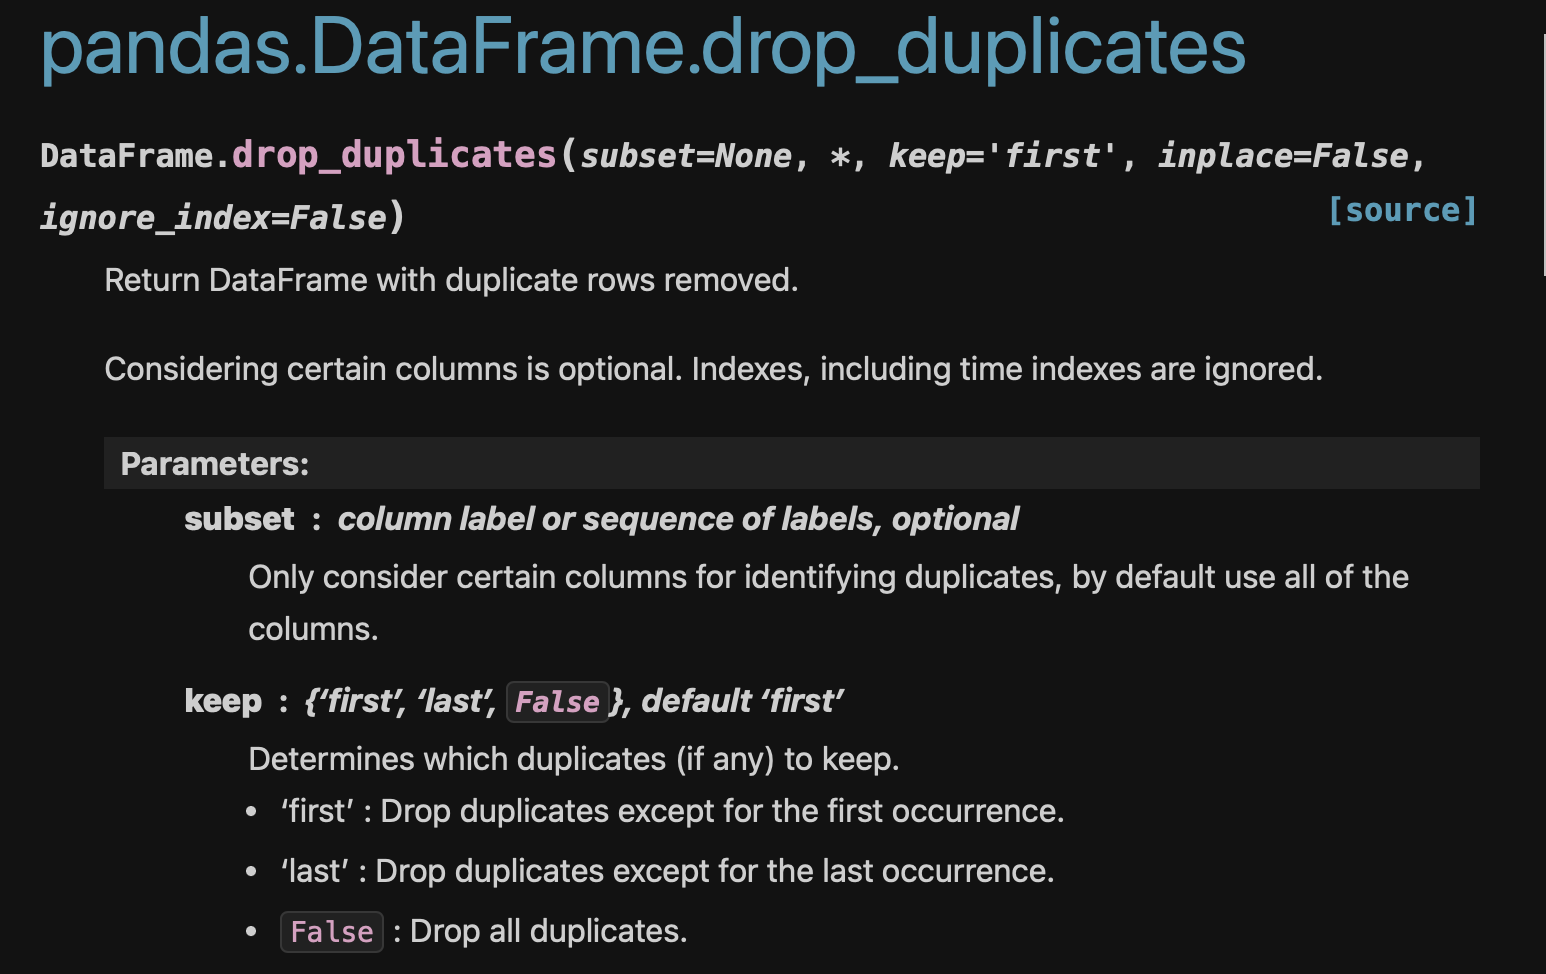

# ข้อมูลบางตัวในชุดข้อมูลมีลักษณะผิดปกติหรือแตกต่างจากข้อมูลส่วนใหญ่ (Outlier)

In [62]:
from matplotlib import pyplot as plt

## Example

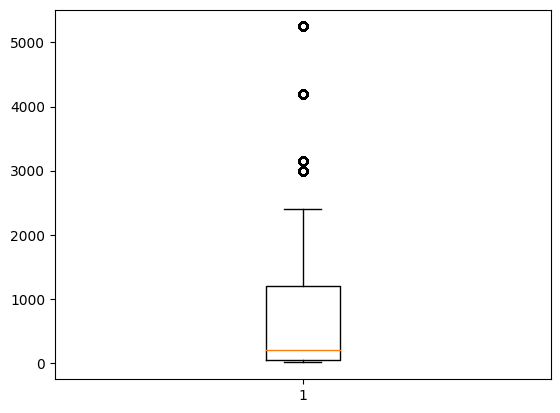

In [65]:
plt.boxplot(shopping_data['price']);

## Fix

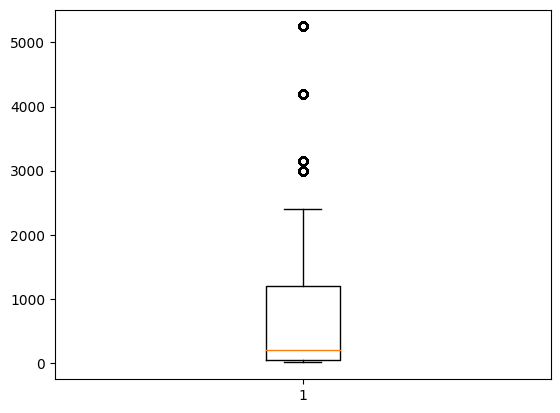

In [66]:
ret = plt.boxplot(shopping_data['price'])

In [74]:
ret

{'whiskers': [<matplotlib.lines.Line2D at 0x78c1c0a55c90>,
 'caps': [<matplotlib.lines.Line2D at 0x78c1c0a561d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78c1c0a559f0>],
 'medians': [<matplotlib.lines.Line2D at 0x78c1c0a56710>],
 'fliers': [<matplotlib.lines.Line2D at 0x78c1c0a569b0>],
 'means': []}

In [77]:
ret['whiskers'][0].get_ydata()

array([45.45,  5.23])

In [78]:
ret['whiskers'][1].get_ydata()

array([1200.32, 2400.68])

In [79]:
ret['whiskers'][1].get_ydata()[1]

2400.68

In [80]:
shopping_data[shopping_data['price']<=ret['whiskers'][1].get_ydata()[1]]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
...,...,...,...,...,...,...,...,...,...,...
99451,I675411,C513603,Male,50,Toys,5,179.20,Cash,9/10/2021,Metropol AVM
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity


# ค่าตัวแปรบางตัวที่ไม่ถูกต้อง (Erroneous Data)

## Example

## Fix

# ข้อมูลมีค่าตัวแปรไม่สอดคล้องซึ่งกันและกัน (Inconsistent)

## Example

## Fix